### KPI.

#### Importacion de Librerias.

In [1]:
%matplotlib inline
%store -r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import copy 
import json
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
from datetime import datetime

#### Importacion de mi variable.
* Imporatnado la variable donde se genero un DtaFrame para la depuración de los datos.
* Instanciando la variable importada.
* Observando mi DataFrame.
* Observando las columnas en una tabla.

In [2]:
# Importando la variable donde se genero un DataFrame para realización del EDA.
df_EDA

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,...,summary,country,surface,category,brand,surviving_crew,survivors,year,month,day
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,...,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0,1908,September,Thursday
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,...,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0,1909,September,Tuesday
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,...,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0,0.0,1912,July,Friday
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,...,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0,0.0,1913,August,Wednesday
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,...,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0,1915,March,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,2021-03-02,17:05:00,"Pieri, Sudan",South Sudan Supreme Airlines,,Pieri - Yuai,Let L-410UVP-E,10.0,8.0,2.0,...,One of the engines on the aircraft failed 10 m...,Sudan,ground,non-military,other,0.0,0.0,2021,March,Tuesday
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,...,The sightseeing helicopter crashed after missi...,United States,ground,non-military,other,0.0,1.0,2021,March,Sunday
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,...,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft,0.0,0.0,2021,May,Friday
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,...,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft,1.0,2.0,2021,June,Thursday


In [3]:
# Instanciando la variable importada.
df_kpi = df_EDA

In [4]:
df_kpi =df_kpi

KPI.

#### KPI.
Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.
* Definimos la tasa de fatalidad de la tripulación como el número total de tripulantes fallecidos en los accidentes registrados en la década a considerar, dividido en la cantidad total de accidentes aéreos ocurridos en este período de tiempo.
* Su fórmula es (Suma total de fallecidos en el período de tiempo / Suma total de accidentes en el período de tiempo).

In [5]:
# Convertir la columna Year a datetime.
df_kpi['year'] = pd.to_datetime(df_kpi['year'], format='%Y')

In [6]:
# Crea una nueva columna 'Década' que representa la década.
df_kpi['decade'] = (df_kpi['year'].dt.year // 10) * 10

In [7]:
# Calculamos la fatalidad para cada vuelo.
df_kpi['mortality_rate'] = (df_kpi['crew_fatalities'] / df_kpi['crew_aboard'])

# Agrupamos por decada.
mortality_by_decada = df_kpi.groupby('decade').agg({'crew_fatalities': 'sum', 'crew_aboard': 'sum'})

# Calculamos la tasa de fatalidad por decada.
mortality_by_decada['mortality_rate'] = mortality_by_decada['crew_fatalities'] / mortality_by_decada['crew_aboard']

# Observamos los valores
mortality_by_decada


,crew_fatalities,crew_aboard,mortality_rate
decade,,,
1900,0.0,2.0,0.000000
1910,51.0,76.0,0.671053
1920,297.0,369.0,0.804878
1930,758.0,1037.0,0.730955
1940,1914.0,2252.0,0.849911
1950,2481.0,2977.0,0.833389
1960,2626.0,3200.0,0.820625
1970,2436.0,3077.0,0.791680
1980,1890.0,2571.0,0.735123


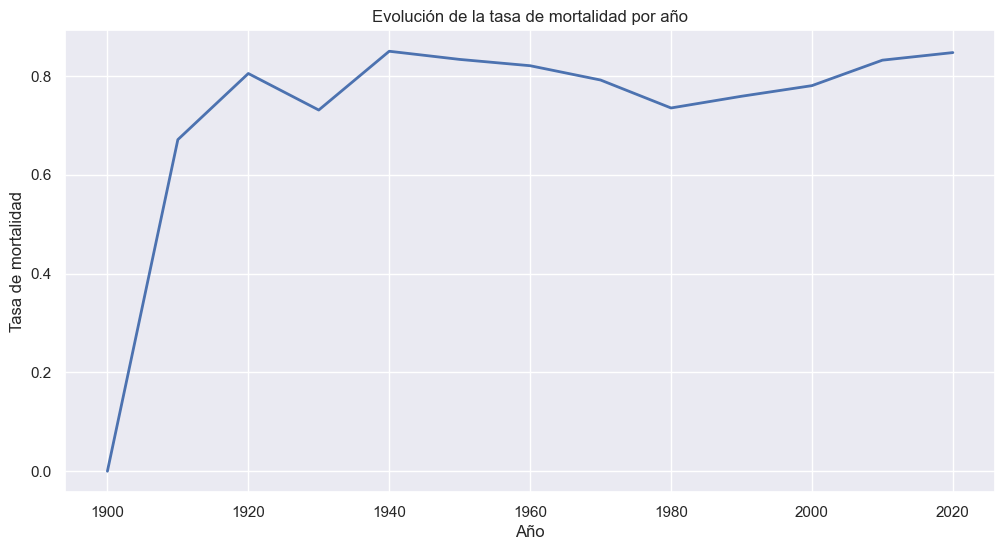

In [8]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=mortality_by_decada, x=mortality_by_decada.index, y='mortality_rate', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Evolución de la tasa de mortalidad por año')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\kpi2', dpi=50)
# Mostrar el gráfico
plt.show()

In [9]:
# Observando las columnas en una tabla.
pd.DataFrame(df_kpi.columns)

,0
0,date
1,time
2,location
3,airline_operator
4,flight_no
5,route
6,aircraft_type
7,total_aboard
8,passengers_aboard
9,crew_aboard


#### KPI.
#### Tasa de Sobrevivencia por decada.

In [10]:

# Calculamos la supervivencia para cada vuelo
df_kpi['survival_rate'] =df_kpi['surviving_crew'] /df_kpi['crew_aboard']

# Agrupamos por decada
survival_by_decada =df_kpi.groupby('decade').agg({'surviving_crew': 'sum', 'crew_aboard': 'sum'})

# Calculamos la tasa de fatalidad por decada.
survival_by_decada['survival_rate'] = survival_by_decada['surviving_crew'] / survival_by_decada['crew_aboard']

# Observamos los valores
survival_by_decada

,surviving_crew,crew_aboard,survival_rate
decade,,,
1900,2.0,2.0,1.000000
1910,25.0,76.0,0.328947
1920,72.0,369.0,0.195122
1930,279.0,1037.0,0.269045
1940,338.0,2252.0,0.150089
1950,496.0,2977.0,0.166611
1960,574.0,3200.0,0.179375
1970,641.0,3077.0,0.208320
1980,681.0,2571.0,0.264877


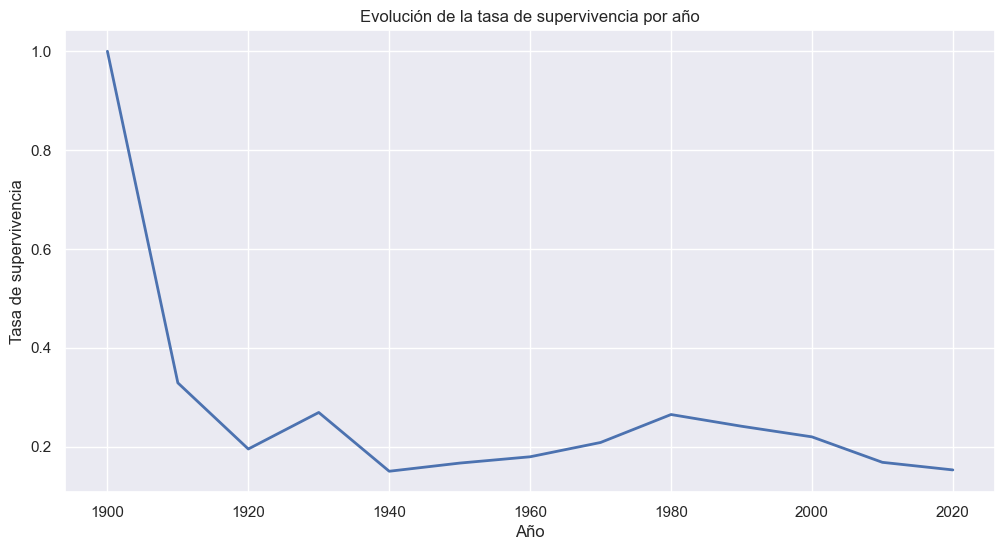

In [11]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=survival_by_decada, x=survival_by_decada.index, y='survival_rate', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de supervivencia')
plt.title('Evolución de la tasa de supervivencia por año')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\kpi4', dpi=50)
# Mostrar el gráfico
plt.show()

In [12]:
df_kpi.shape

(4770, 26)

In [13]:
df_kpi = df_kpi

In [14]:
df_kpi.to_csv(r'C:\Users\ingju\Desktop\proyect02\csv\AccidentesAereos_Final.csv', index= False)

#### %store

In [15]:
%store df_kpi

Stored 'df_kpi' (DataFrame)
